# Convolutional Neural Networks with Food101-Dataset
## Binary classification of Pizza/Steak

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-05-10 17:46:24.351658


In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-10 17:46:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 173.194.196.207, 173.194.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   242MB/s    in 0.4s    

2024-05-10 17:46:54 (242 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


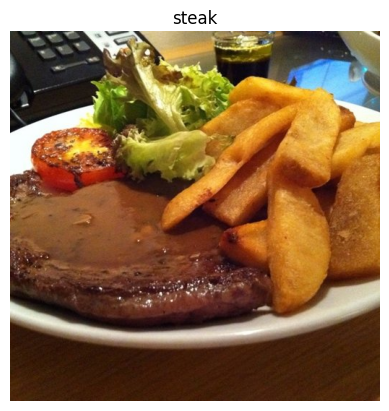

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [9]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/50
47/47 [==============================] - 14s 163ms/step - loss: 0.6278 - accuracy: 0.6133 - val_loss: 0.4782 - val_accuracy: 0.8120
Epoch 2/50
47/47 [==============================] - 6s 121ms/step - loss: 0.4548 - accuracy: 0.7893 - val_loss: 0.3792 - val_accuracy: 0.8420
Epoch 3/50
47/47 [==============================] - 6s 126ms/step - loss: 0.4002 - accuracy: 0.8313 - val_loss: 0.3507 - val_accuracy: 0.8600
Epoch 4/50
47/47 [==============================] - 6s 120ms/step - loss: 0.3562 - accuracy: 0.8480 - val_loss: 0.3294 - val_accuracy: 0.8640
Epoch 5/50
47/47 [==============================] - 7s 156ms/step - loss: 0.3182 - accuracy: 0.8680 - val_loss: 0.3330 - val_accuracy: 0.8600
Epoch 6/50
47/47 [==============================] - 6s 123ms/step - loss: 0.2356 - accuracy: 0.9120 - val_loss: 0.3343 - val_accuracy: 0.8640
Epoch 7/50
47/47 [==============================] - 6s 127ms/ste

In [11]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

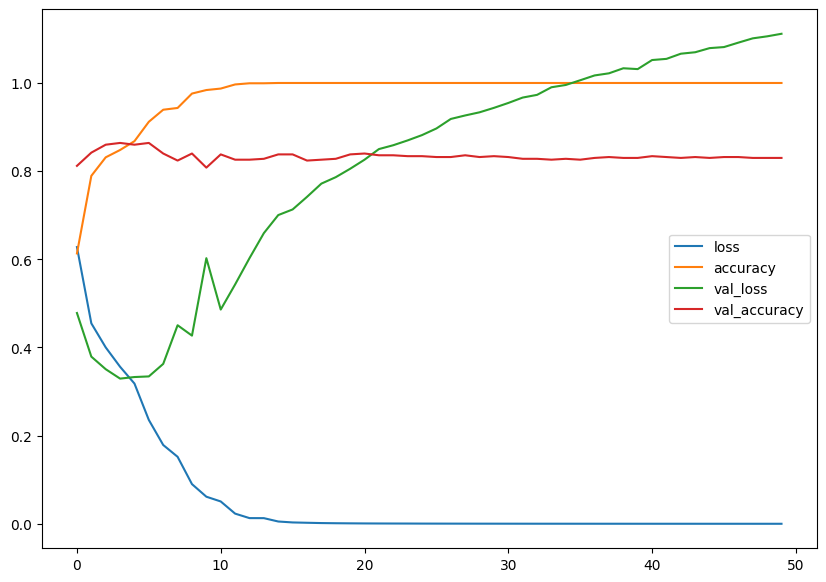

In [12]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

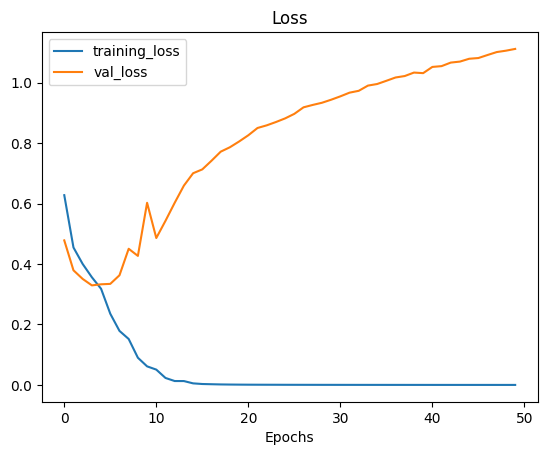

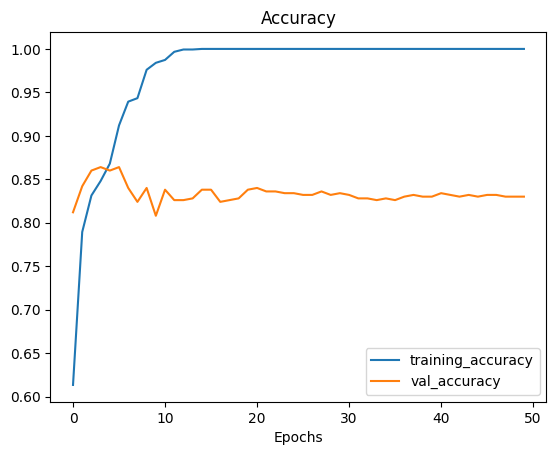

In [14]:
# Check out the loss curves of model_4
plot_loss_curves(history_1)

## Data augmentation before training

In [15]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [17]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

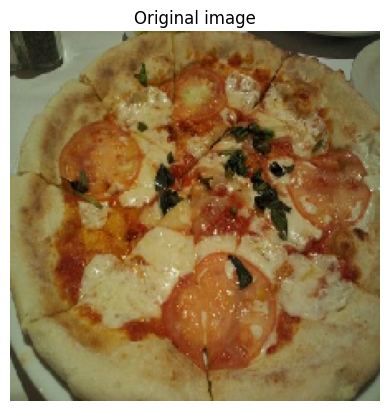

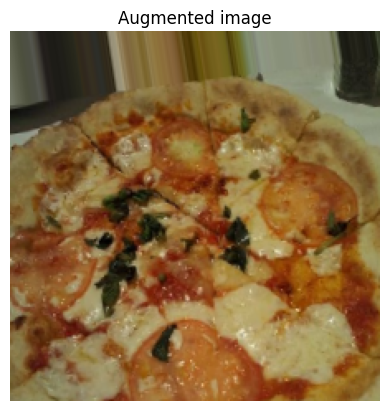

In [19]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [6]:
# Make the creating of our model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
 # Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/25
47/47 [==============================] - 28s 541ms/step - loss: 0.7868 - accuracy: 0.4740 - val_loss: 0.6881 - val_accuracy: 0.5240
Epoch 2/25
47/47 [==============================] - 22s 456ms/step - loss: 0.7035 - accuracy: 0.4073 - val_loss: 0.6892 - val_accuracy: 0.5020
Epoch 3/25
47/47 [==============================] - 21s 447ms/step - loss: 0.6946 - accuracy: 0.5007 - val_loss: 0.6877 - val_accuracy: 0.5040
Epoch 4/25
47/47 [==============================] - 23s 499ms/step - loss: 0.6916 - accuracy: 0.5360 - val_loss: 0.6872 - val_accuracy: 0.7060
Epoch 5/25
47/47 [==============================] - 21s 444ms/step - loss: 0.6842 - accuracy: 0.6127 - val_loss: 0.6598 - val_accuracy: 0.7240
Epoch 6/25
47/47 [==============================] - 22s 471ms/step - loss: 0.6786 - accuracy: 0.5640 - val_loss: 0.6285 - val_accuracy: 0.7160
Epoch 7/25
47/47 [==============================] - 22s 466ms/step - loss: 0.6345 - accuracy: 0.6833 - val_loss: 0.6940 - val_accuracy: 0.5000

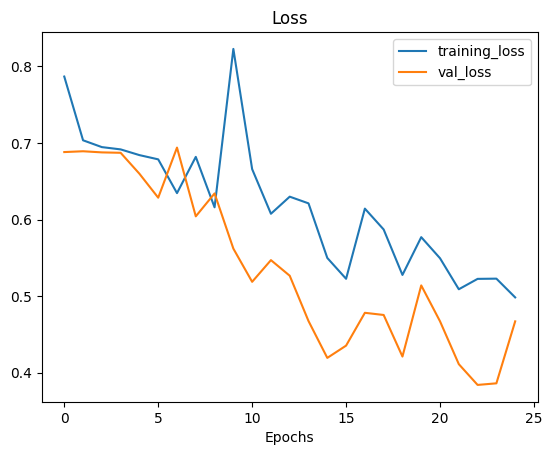

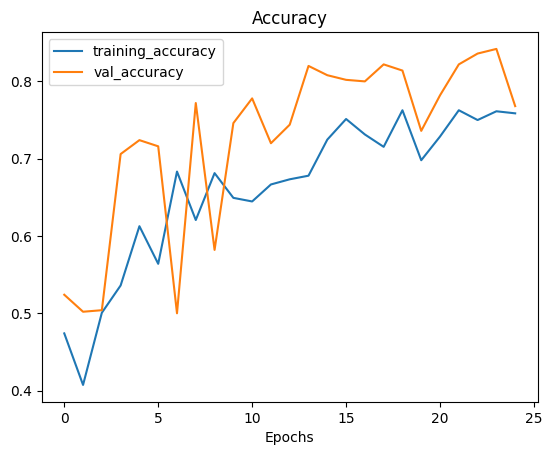

In [24]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

## Data Augmentation with shuffling

In [25]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [26]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/25
47/47 [==============================] - 29s 580ms/step - loss: 0.6657 - accuracy: 0.5940 - val_loss: 0.5738 - val_accuracy: 0.7640
Epoch 2/25
47/47 [==============================] - 23s 482ms/step - loss: 0.5428 - accuracy: 0.7260 - val_loss: 0.4695 - val_accuracy: 0.7620
Epoch 3/25
47/47 [==============================] - 22s 463ms/step - loss: 0.4903 - accuracy: 0.7647 - val_loss: 0.4256 - val_accuracy: 0.8080
Epoch 4/25
47/47 [==============================] - 20s 429ms/step - loss: 0.4899 - accuracy: 0.7833 - val_loss: 0.3853 - val_accuracy: 0.8360
Epoch 5/25
47/47 [==============================] - 22s 461ms/step - loss: 0.4518 - accuracy: 0.7947 - val_loss: 0.3537 - val_accuracy: 0.8460
Epoch 6/25
47/47 [==============================] - 21s 437ms/step - loss: 0.4508 - accuracy: 0.8027 - val_loss: 0.3151 - val_accuracy: 0.8700
Epoch 7/25
47/47 [==============================] - 23s 483ms/step - loss: 0.4290 - accuracy: 0.8107 - val_loss: 0.3044 - val_accuracy: 0.8800

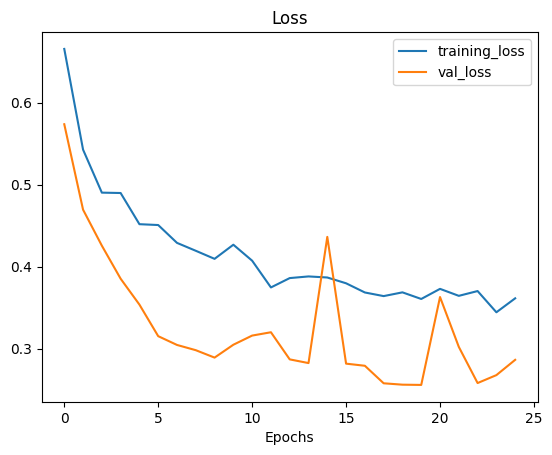

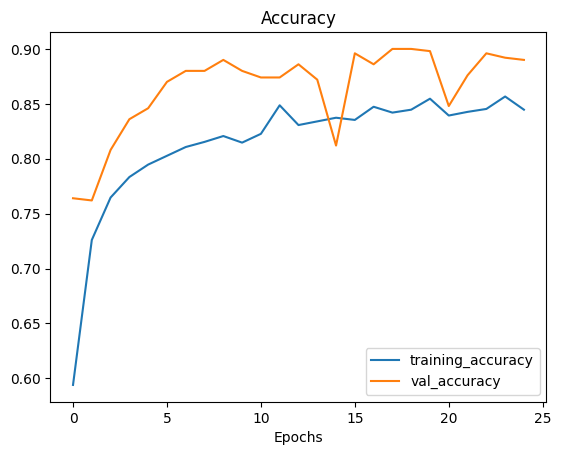

In [27]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [28]:
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

In [29]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [30]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 424ms/step


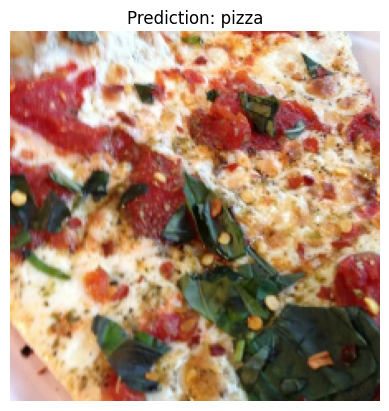

In [31]:
pred_and_plot(model_7, "pizza_steak/test/pizza/1106738.jpg", class_names)

1/1 [==============================] - 0s 19ms/step


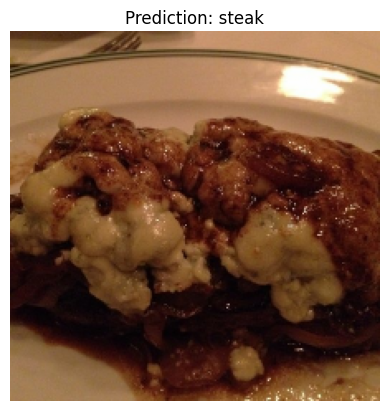

In [33]:
pred_and_plot(model_7, "pizza_steak/test/steak/1107549.jpg", class_names)

# Multi-class classification with 10 food classes in the Food101-dataset

In [4]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-11 10:54:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.207, 142.250.152.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   228MB/s    in 2.2s    

2024-05-11 10:54:24 (228 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [35]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [2]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [3]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


Image shape: (512, 512, 3)


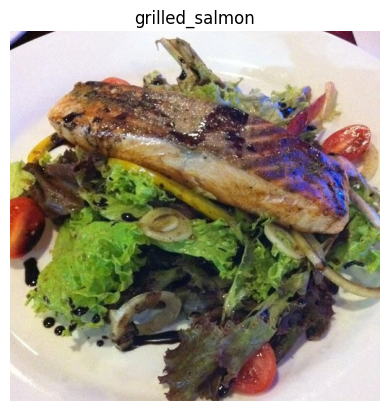

In [41]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
img_height =224
img_width =224
batch_size =32
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [66]:
from tensorflow.keras import layers


model_9 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model_9.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_ds, # now 10 different classes
                        epochs=25,
                        steps_per_epoch=len(train_ds),
                        validation_data=val_ds,
                        validation_steps=len(val_ds))

Epoch 1/25
235/235 [==============================] - 9s 32ms/step - loss: 2.3306 - accuracy: 0.1311 - val_loss: 2.2414 - val_accuracy: 0.2064
Epoch 2/25
235/235 [==============================] - 7s 31ms/step - loss: 2.1146 - accuracy: 0.2348 - val_loss: 1.9657 - val_accuracy: 0.3032
Epoch 3/25
235/235 [==============================] - 8s 32ms/step - loss: 1.9324 - accuracy: 0.3207 - val_loss: 1.9425 - val_accuracy: 0.3076
Epoch 4/25
235/235 [==============================] - 8s 32ms/step - loss: 1.7503 - accuracy: 0.3901 - val_loss: 1.8212 - val_accuracy: 0.3628
Epoch 5/25
235/235 [==============================] - 8s 34ms/step - loss: 1.5079 - accuracy: 0.4791 - val_loss: 1.9279 - val_accuracy: 0.3492
Epoch 6/25
235/235 [==============================] - 7s 31ms/step - loss: 1.2069 - accuracy: 0.5780 - val_loss: 2.0596 - val_accuracy: 0.3520
Epoch 7/25
235/235 [==============================] - 7s 32ms/step - loss: 0.9344 - accuracy: 0.6721 - val_loss: 2.2184 - val_accuracy: 0.3556

In [67]:
model_9.evaluate(val_ds)

79/79 [==============================] - 1s 13ms/step - loss: 4.3203 - accuracy: 0.3448


[4.320260524749756, 0.3447999954223633]

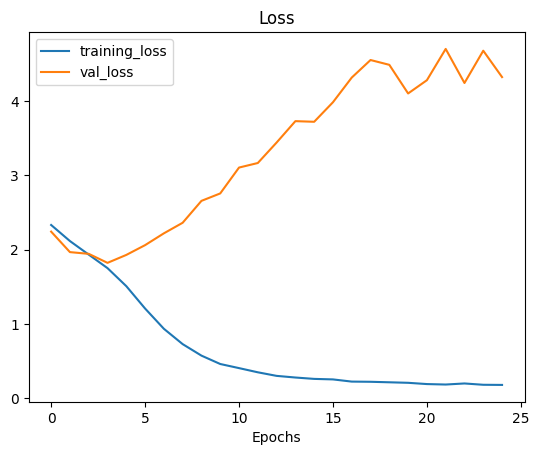

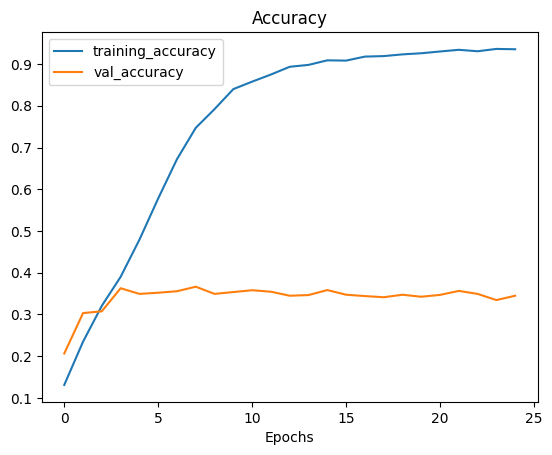

In [68]:
plot_loss_curves(history_9)

# Data augmentation with Tensorflow + CNN multi-class classification

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
#from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam

In [11]:
num_classes = len(class_names)
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  #layers.RandomHeight(0.2),
  #layers.RandomWidth(0.2),
  #preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
])

IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

inputs = layers.Input(shape=(img_height, img_width, 3), name="input_layer")
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(x)
#x = resize_and_rescale(x)
x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_10 = keras.Model(inputs, outputs)

# Compile the model
model_10.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_ds, # now 10 different classes
                        epochs=25,
                        steps_per_epoch=len(train_ds),
                        validation_data=val_ds,
                        validation_steps=len(val_ds))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 538s 2s/step - loss: 2.2540 - accuracy: 0.1537 - val_loss: 2.1554 - val_accuracy: 0.2272
Epoch 2/25
235/235 [==============================] - 545s 2s/step - loss: 2.1481 - accuracy: 0.2215 - val_loss: 2.0434 - val_accuracy: 0.2880
Epoch 3/25
235/235 [==============================] - 502s 2s/step - loss: 2.0826 - accuracy: 0.2511 - val_loss: 1.9983 - val_accuracy: 0.2844
Epoch 4/25
235/235 [==============================] - 512s 2s/step - loss: 2.0624 - accuracy: 0.2685 - val_loss: 1.9479 - val_accuracy: 0.3140
Epoch 5/25
235/235 [==============================] - 504s 2s/step - loss: 2.0369 - accuracy: 0.2681 - val_loss: 1.9199 - val_accuracy: 0.3324
Epoch 6/25
235/235 [==============================] - 507s 2s/step - loss: 2.0154 - accuracy: 0.2829 - val_loss: 1.9255 - val_accuracy: 0.3180
Epoch 7/25
235/235 [==============================] - 508s 2s/step - loss: 1.9970 - accuracy: 0.2904 - val_loss: 1.9085 - val_accuracy: 0.3252
Epoch 8/25

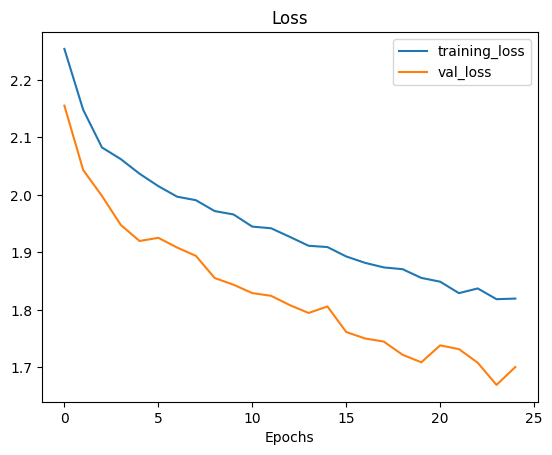

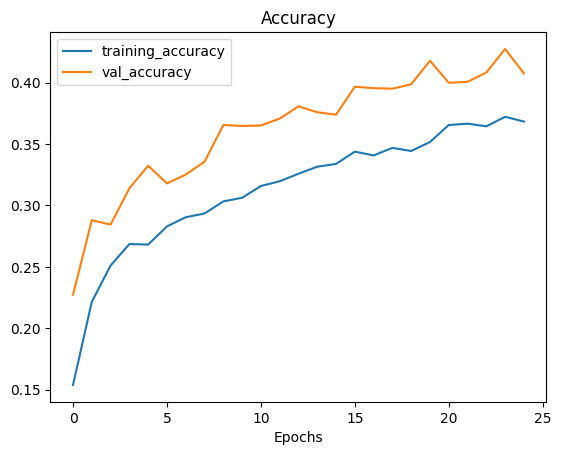

In [15]:
import matplotlib.pyplot as plt

plot_loss_curves(history_10)